## Lesson-01 Syntax Tree and Probability Models
1.语法可以通过定义最简单的函数来实现  
2.我们可以通过递归，来生成更复杂、“无限”长的文字  

以下介绍“生成语言”的方法（这部分内容直到Language Model之前）

In [79]:
# 语法树，Syntax Tree（树状结构图另见《学习笔记_课堂示例中的语法树SyntaxTree》.pptx）
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [80]:
import random

In [81]:
def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
# def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).strip()
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [82]:
adj_star()

'好看的蓝色的'

## But the question is ? 


如果我们更换了语法，会发现所有写过的程序，都要重新写。:( 

生成语言的逻辑包含在代码中，这就是所谓的“Procedure Driven”，逻辑变了代码就要变。  
如何做到输入的数据变了，但代码不用变？（Data Driven）  
要把生成语言的逻辑抽象出来，即构建所谓的“规则引擎”。

【高老师】我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

【高老师】AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

step1：定义语法树（Syntax Tree）

In [83]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

step2：解析语法树  
将用来描述语法树的字符串/配置文本解析成程序可以直接操作的字典数据结构

In [84]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [85]:
grammar = create_grammar(adj_grammar)

In [86]:
grammar['Adj']

[['蓝色的'], ['好看的'], ['小小的']]

step3:生成语言

In [87]:
# 解析课程开头的语法树
example_grammar = create_grammar(simple_grammar)

In [88]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [118]:
# 基于语法规则生成语言

choice = random.choice #为了缩短后面代码长度，提升易读性，生成一个方法(method)变量

# 传入语法字典、要生成的目标类型，传出生成结果
# 为了读懂下面的代码，递归过程分解另见《学习笔记_递归过程分解》.xmind
def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])
#     return ''.join([e for e in expaned if e != 'null'])

In [119]:
generate(gram=example_grammar, target='sentence')

'这个小小的篮球看见一个女人'

更多例子：

In [151]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""


In [140]:
# line = 'host = 寒暄 报数 询问 业务相关 结尾'
# grammar = {}
# exp, stmt = line.split('=')
# grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
# print(grammar)
# # for s in stmt.split('|'):
# #     print(s.split())

{'host': [['寒暄', '报数', '询问', '业务相关', '结尾']]}


In [136]:
# create_grammar(host, split='=')

{'host': [['寒暄', '报数', '询问', '业务相关', '结尾']],
 '报数': [['我是', '数字', '号', ',']],
 '数字': [['单个数字'], ['数字', '单个数字']],
 '单个数字': [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']],
 '寒暄': [['称谓', '打招呼'], ['打招呼']],
 '称谓': [['人称', ',']],
 '人称': [['先生'], ['女士'], ['小朋友']],
 '打招呼': [['你好'], ['您好']],
 '询问': [['请问你要'], ['您需要']],
 '业务相关': [['玩玩', '具体业务']],
 '玩玩': [['null']],
 '具体业务': [['喝酒'], ['打牌'], ['打猎'], ['赌博']],
 '结尾': [['吗？']]}

In [152]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

您好我是2号,您需要打牌吗？
您好我是5号,您需要打牌吗？
小朋友,你好我是7号,请问你要赌博吗？
女士,你好我是14号,请问你要喝酒吗？
小朋友,你好我是81号,您需要打牌吗？
小朋友,你好我是1号,您需要打牌吗？
女士,您好我是8号,请问你要赌博吗？
小朋友,您好我是6号,您需要喝酒吗？
您好我是7号,请问你要打牌吗？
女士,您好我是1号,请问你要喝酒吗？
您好我是48号,请问你要打牌吗？
小朋友,你好我是3号,请问你要打猎吗？
先生,你好我是94号,请问你要打猎吗？
小朋友,你好我是94371679号,请问你要赌博吗？
小朋友,您好我是4786号,您需要赌博吗？
小朋友,你好我是3号,您需要打猎吗？
你好我是2号,请问你要赌博吗？
小朋友,你好我是8号,您需要赌博吗？
小朋友,你好我是9号,请问你要赌博吗？
你好我是544号,请问你要打牌吗？


【高老师】希望能够生成最合理的一句话？ （见Language Model ：1-Gram模型的原理与代码实现）

更多Data Driven的例子：自动生成程序代码

In [41]:
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [42]:
print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

while(info_lib>=database_info_lib_database_name){/Nif(lib_9_2<=lib_database_4_3_1){/Nif(lib_infostudent){/Nif(info_student_8<info_name_9_7){/Nlib_database=name/N}/N}/N}/N}


In [43]:
def pretty_print(line):
    # utility tool function
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2: 
            #print()
            code_lines.append(i * "  " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    
    return code_lines

In [44]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

In [45]:
for line in generated_programming:
    print(line)

if(database_0<=database){
  if(database<=lib_lib){
    student_database=lib_lib
      }else{
        student_name_student_database_6=database_name_6_9
          }
            }else{
              if(student<=lib_lib){
                database_lib_name=database_lib
                  }else{
         if(info_student>=lib_info_lib_5_3_9_8){
        if(name_infoinfo_database_name_0){
       name_student_info_lib_student_5_0_9_1=lib
      }else{
     lib_database_7_6=lib_database
    }
   }
  }
 }
database_info_student=database_database
if(student_8_4_1<=info){
  student_lib_info_lib=name_2_2_4_7_6_6_3_1_4
    }else{
      if(name_info_8_5==lib_2_0_5){
        if(info_nameinfo_9_2_8){
          if(info<student_info_lib_name_lib){
     student=name_4_9
    }
   }
  }
 }
if(student_database_student_namelib){
  if(name_lib_database_student_4_9>=database_lib){
    if(lib<lib_name_8){
      database=name
        }else{
          student_3_8_3_2=name_3_8
            }
              }
             

写在最后  
Machine learning 之前的提法是 Based on Statistical Data Driven Way  
Eliza Robot MIT人工智能实验室，世界上第一个人工智能产品，就是基于语法树生成语言，课堂作业提供了源代码可供研究。  


# Language Model ：1-Gram模型的原理与代码实现

语言生成出来了，要判断哪些语句是正确的。  
早些年的时候，由语言学家来制定语法规则，根据语法规则判断语句是否正确。  
但是语言是非常灵活的，实际语境中的语法难以穷尽。  
“Every time I fire a linguist，the performance of the speech recognizer gose up.”  
研究者转向依赖 Probability Based Language Model  

理论基础：  
1 条件概率  
2 独立概率  

单词出现的条件概率的递推过程：  
sentence = '其实 就和 随机森林 原理 一样'  
Pr(其实&就和&随机森林&原理&一样)  
->Pr(其实|就和&随机森林&原理&一样)Pr(就和&随机森林&原理&一样)  
语言学家做了一个简化：文本中单词距离越近关系越紧密，那么设：每个单词出现的概率只跟离它最近的单词有关。  
当“最近”距离定义为1时：（【高老师】“像Google这样的大公司距离定位到3就够用了。”）  
->Pr(其实|就和)Pr(就和&随机森林&原理&一样) #简化  
->Pr(其实|就和)Pr(就和|随机森林&原理&一样)Pr(随机森林&原理&一样)  
->Pr(其实|就和)Pr(就和|随机森林)Pr(随机森林&原理&一样) #简化  
... #经过一系列的简化  
->Pr(其实|就和)Pr(就和|随机森林)Pr(随机森林&原理)Pr(原理&一样)Pr(一样)  
这其中：

$$ Pr(其实|就和) = \frac{N("其实就和")}{N("就和")} $$

将上述递推过程推广到一般情况： $$Pr(sentence)=Pr(w_1w_2...w_n)= \prod_i^{n-1} \frac {N(w_iw_{i+1})}{N(w_{i+1})}*Pr(w_n)$$

我们考虑用代码实现上述逻辑

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

Step1:从硬盘文件读取新闻文本

In [5]:
filename = r'D:\人工智能与自然语言处理006期_开课吧\第二章第1节-人工智能引论之概率模型与语言自动生成模型\export_sql_1558435\sqlResult_1558435.csv'

In [6]:
import pandas as pd

In [7]:
content = pd.read_csv(filename, encoding='gb18030')

In [8]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [9]:
articles = content['content'].tolist() #仅保留新闻正文，并转化为列表

In [10]:
len(articles)

89611

Step2：数据清洗

In [16]:
import re,jieba

In [18]:
from collections import Counter

In [19]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\SAMISG~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.858 seconds.
Prefix dict has been built successfully.


In [20]:
with_jieba_cut.most_common()[:10] #原文本中含有大量无意义字符，需要清洗

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [17]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [21]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [22]:
%time articles_clean = [''.join(token(str(a)))for a in articles]

Wall time: 1.71 s


In [23]:
len(articles_clean)

89611

## 【高老师】
AI的问题里边，65%的时间都是在做数据预处理。  
为了避免数据处理流程重复消耗时间，及时保存重要的过程数据到硬盘。

Step3：切词

In [24]:
wfilePath = r'D:\人工智能与自然语言处理006期_开课吧\第二章第1节-人工智能引论之概率模型与语言自动生成模型\export_sql_1558435\articles_clean.txt'

with open(wfilePath, 'w') as wfile:
    for a in articles_clean:
        wfile.write(a + '\n')

In [28]:
# 对一行文本做切词
def cut(string): return list(jieba.cut(string.strip('\n')))

In [30]:
# 高老师上课时为了节省程序运行时间，只从文档集中抽样了10000行做切词
# TOKEN = []
# for i, line in enumerate((open(wfilePath))):
#     if i % 100 == 0: print(i)
#     # replace 10000 with a big number when you do your homework. 
#     if i > 10000: break    
#     TOKEN += cut(line)


# 我现在做代码复现的作业，为了保证效果，对全量文本逐行做切词
def cutAllLines(filePath):
    token = []
    with open(filePath,'r') as file:
        for line in file:
            token+=cut(line)
    return token
%time TOKEN = cutAllLines(filePath=wfilePath)
print('Done')

Wall time: 2min 34s
Done


Step4：统计词频并计算词的2-Gram概率

In [32]:
from collections import Counter

In [34]:
# 统计每个词的词频，生成统计结果列表[(词, 词频)]
%time words_count = Counter(TOKEN)

Wall time: 2.19 s


In [51]:
words_count.most_common(20)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998)]

【统计前100词频的分布规律】

In [36]:
frequiences = [f for w, f in words_count.most_common(100)] #将词频Top100存成一个列表

In [37]:
x = [i for i in range(100)]

In [38]:
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt

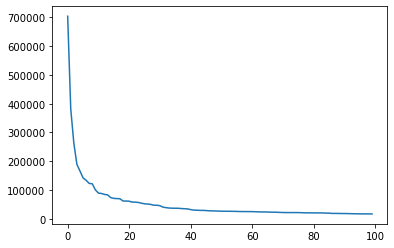

In [40]:
plt.plot(x, frequiences)

## 【高老师】 
NLP的重要规律：在一个很大的text corpus中，出现频率第二多的单词，是出现频率第一多单词的频率的1/2，出现频率第n多的单词，是出现频率第一多单词的频率的1/n。

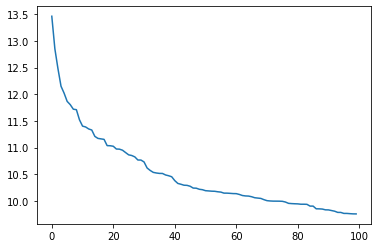

In [42]:
plt.plot(x, np.log(frequiences))

回到正题...

In [113]:
# 计算一个词的独立出现概率
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [114]:
prob_1('我们')

0.0011341645999654677

In [115]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [47]:
TOKEN = [str(t) for t in TOKEN] #将TOKEN中的全部词转为字符串类型

In [48]:
# 将TOKEN中相邻词逐一组合到一起
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [49]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [55]:
# 统计每个相邻词组的词频，生成统计结果列表[(词组, 词频)]
words_count_2 = Counter(TOKEN_2_GRAM)

In [105]:
# 计算：相邻词组的出现频次 除以 相邻词组中后一个词出现频率
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / words_count[word2]
    # out of vocabulary problem，如果单词没有出现在词库中，设其概率为1/词汇量
    else: 
        return 1 / len(words_count)

In [106]:
prob_2('我们', '在')

0.0020409943967495837

$$Pr(sentence)=Pr(w_1w_2...w_n)= \prod_i^{n-1} \frac {N(w_iw_{i+1})}{N(w_{i+1})}*Pr(w_n)$$

对以下代码的讲解在课程视频3h25min处

Step5：计算一句话的出现概率（实现2-Gram）

In [107]:
# 实现上述1-Gram计算公式
def get_probablity(sentence):
    words = cut(sentence) #对一句话做切词
    
    sentence_pro = 1 # 初始化这句话的出现概率
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    
    sentence_pro *= prob_1(words[-1]) #乘以公式最后一项：最后一个词的出现概率
    return sentence_pro

In [108]:
get_probablity('小明今天抽奖抽到一台苹果手机')

1.6649733536503897e-33

In [109]:
get_probablity('小明今天抽奖抽到一架波音飞机')

8.677936260560327e-30

In [110]:
get_probablity('洋葱奶昔来一杯')

7.580540796399728e-19

In [111]:
get_probablity('养乐多绿来一杯')

7.125708348615745e-17

Step6：比较自动生成的语句的“是正常语句”的概率

In [89]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [116]:
# 生成10条语句，并计算每一句的概率
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个女人听着这个篮球 with Prb: 3.0735162853768162e-21
sentence: 一个好看的小猫看见一个桌子 with Prb: 1.339402560001278e-23
sentence: 一个好看的小小的篮球看着这个蓝色的蓝色的桌子 with Prb: 6.544844001506326e-41
sentence: 这个小猫看见一个桌子 with Prb: 1.3825534919569084e-22
sentence: 一个小猫听着这个小小的女人 with Prb: 4.181716737877728e-28
sentence: 一个小小的小小的小小的桌子看着一个女人 with Prb: 4.33484186749214e-35
sentence: 这个篮球看着一个好看的好看的好看的女人 with Prb: 1.67531906890294e-41
sentence: 一个篮球看着一个好看的好看的小小的好看的好看的好看的篮球 with Prb: 3.360678867277524e-58
sentence: 这个蓝色的篮球看着一个桌子 with Prb: 1.2002824466628367e-27
sentence: 这个蓝色的女人坐在一个篮球 with Prb: 2.616479679318347e-24


In [117]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.5903389425741782e-45
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 6.653978135730363e-43
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 3.0233993266831647e-27
---- 真是一只好看的小猫 with probility 8.273018279582945e-22
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.7325227255339101e-18
---- 今晚火锅去吃我 with probility 1.4852604423993444e-20
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 7.580540796399728e-19
---- 养乐多绿来一杯 with probility 7.125708348615745e-17


## 【高老师】
More Data, Better Result.  
模型再好，不如数据量大。  
数据比模型重要。